In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, label_binarize
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_train = pd.read_csv("Trains.csv")
data_test = pd.read_csv("Tests.csv")

In [3]:
data_train.head(5)

,ID,Date,LicenseNo,Assessment_ID,Assessment_Name,Restaurent Type,Street ID,City ID,State ID,LocationID,Reason,SectionViolations,Risk_level,Geographical_Location,Assessment_Results
0,0,7/8/2017,35576,27170,25928,RESTAURANT,14291,id-11235901,id_1890134,81874.0,COMPLAINT,3.0,High,locid3070,1
1,1,28-06-2016,33490,9159,8683,BAKERY,15266,id-11235901,id_1890134,81876.0,CANVASS,18.0,High,locid16348,1
2,2,6/7/2014,1716,12151,11559,RESTAURANT,10113,id-11235901,id_1890134,81886.0,CANVASS,32.0,High,locid13425,4
3,3,3/6/2015,11101,12030,11446,RESTAURANT,274,id-11235901,id_1890134,81873.0,COMPLAINT,18.0,High,locid656,1
4,4,26-02-2017,28642,21406,20451,RESTAURANT,7338,id-11235901,id_1890134,81902.0,CANVASS,34.0,High,locid12104,4


In [4]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117491 entries, 0 to 117490
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID                     117491 non-null  int64  
 1   Date                   117491 non-null  object 
 2   LicenseNo              117491 non-null  int64  
 3   Assessment_ID          117491 non-null  int64  
 4   Assessment_Name        117491 non-null  int64  
 5   Restaurent Type        115862 non-null  object 
 6   Street ID              117491 non-null  int64  
 7   City ID                117491 non-null  object 
 8   State ID               117491 non-null  object 
 9   LocationID             117469 non-null  float64
 10  Reason                 117491 non-null  object 
 11  SectionViolations      90615 non-null   float64
 12  Risk_level             117491 non-null  object 
 13  Geographical_Location  117491 non-null  object 
 14  Assessment_Results     117491 non-nu

In [5]:
data_train = data_train.drop(['ID', 'Date'], axis=1)
data_train.rename(columns = {'LicenseNo' : 'License_No', 'Restaurent Type' : 'Restaurent_Type',
                            'Street ID' : 'Street_ID', data_train.columns[5] : 'City_ID', 'State ID' : 'State_ID',
                            'LocationID' : 'Location_ID', 'SectionViolations' : 'Section_Violations'}, inplace = True)
for i in range(data_train.City_ID.size):
    data_train.at[i, 'City_ID'] = data_train['City_ID'][i].replace('id-', '')
    data_train.at[i, 'Street_ID'] = int(data_train['Street_ID'][i])
    data_train.at[i, 'State_ID'] = data_train['State_ID'][i].replace('id_', '')
    data_train.at[i, 'Geographical_Location'] = int(data_train['Geographical_Location'][i].replace('locid', ''))

cols = ['City_ID', 'State_ID', 'Risk_level']
 
for col in cols:
    lbl = preprocessing.LabelEncoder()
    lbl.fit(list(data_train[col].values.astype('str')))
    print(lbl.classes_)  # взглянем на категориальные классы
    data_train[col] = lbl.transform(list(data_train[col].values.astype('str')))

data_train.Restaurent_Type = data_train['Restaurent_Type'].map(data_train.groupby('Restaurent_Type').size())
data_train = data_train.loc[data_train['Restaurent_Type'] > 0.05 * data_train.Restaurent_Type.max()]

['11235901' '11275913']
['1890134' '1890135']
['High' 'Low' 'Medium' 'Uncertain']


In [6]:
lbl = preprocessing.LabelEncoder()
lbl.fit(list(data_train['Restaurent_Type'].values.astype('float')))
print(lbl.classes_)  # взглянем на категориальные классы
data_train['Restaurent_Type'] = lbl.transform(list(data_train['Restaurent_Type'].values.astype('float')))

[ 7970. 15142. 78151.]


In [7]:
data_train.Reason = data_train['Reason'].map(data_train.groupby('Reason').size())
data_train = data_train.loc[data_train['Reason'] > 10000]
data_train.Reason.unique()

array([10176, 51244, 11770, 12529], dtype=int64)

In [8]:
lbl = preprocessing.LabelEncoder()
lbl.fit(list(data_train['Reason'].values.astype('int')))
print(lbl.classes_)  # взглянем на категориальные классы
data_train['Reason'] = lbl.transform(list(data_train['Reason'].values.astype('int')))

[10176 11770 12529 51244]


In [9]:
data_train.isnull().sum()

License_No                   0
Assessment_ID                0
Assessment_Name              0
Restaurent_Type              0
Street_ID                    0
City_ID                      0
State_ID                     0
Location_ID                 14
Reason                       0
Section_Violations       15045
Risk_level                   0
Geographical_Location        0
Assessment_Results           0
dtype: int64

In [10]:
data_train = data_train.dropna()

In [11]:
data_train.isnull().sum()

License_No               0
Assessment_ID            0
Assessment_Name          0
Restaurent_Type          0
Street_ID                0
City_ID                  0
State_ID                 0
Location_ID              0
Reason                   0
Section_Violations       0
Risk_level               0
Geographical_Location    0
Assessment_Results       0
dtype: int64

In [12]:
data_train.drop_duplicates(keep='first', inplace = True)

In [13]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61917 entries, 0 to 117488
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   License_No             61917 non-null  int64  
 1   Assessment_ID          61917 non-null  int64  
 2   Assessment_Name        61917 non-null  int64  
 3   Restaurent_Type        61917 non-null  int64  
 4   Street_ID              61917 non-null  int64  
 5   City_ID                61917 non-null  int32  
 6   State_ID               61917 non-null  int32  
 7   Location_ID            61917 non-null  float64
 8   Reason                 61917 non-null  int64  
 9   Section_Violations     61917 non-null  float64
 10  Risk_level             61917 non-null  int32  
 11  Geographical_Location  61917 non-null  object 
 12  Assessment_Results     61917 non-null  int64  
dtypes: float64(2), int32(3), int64(7), object(1)
memory usage: 5.9+ MB


In [14]:
scaler = MinMaxScaler()

df = pd.DataFrame(scaler.fit_transform(data_train.drop('Assessment_Results', axis = 1)),
            columns=data_train.drop('Assessment_Results', axis = 1).columns, index=data_train.drop('Assessment_Results', axis = 1).index)
df['Assessment_Results'] = data_train.Assessment_Results

data_train = df
data_train

,License_No,Assessment_ID,Assessment_Name,Restaurent_Type,Street_ID,City_ID,State_ID,Location_ID,Reason,Section_Violations,Risk_level,Geographical_Location,Assessment_Results
0,0.951433,0.996114,0.996235,1.0,0.798804,0.0,0.0,0.123894,0.000000,0.028986,0.0,0.182619,1
2,0.045892,0.445483,0.444133,1.0,0.565239,0.0,0.0,0.176991,1.000000,0.449275,0.0,0.798584,4
3,0.296882,0.441047,0.439791,1.0,0.015206,0.0,0.0,0.119469,0.000000,0.246377,0.0,0.039022,1
4,0.765993,0.784792,0.785791,1.0,0.410107,0.0,0.0,0.247788,1.000000,0.478261,0.0,0.720005,4
5,0.752781,0.800117,0.801314,1.0,0.967408,0.0,0.0,0.225664,1.000000,0.463768,0.0,0.069121,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
117478,0.928889,0.119556,0.117306,1.0,0.404405,0.0,0.0,0.092920,1.000000,0.449275,0.0,0.522931,4
117483,0.281558,0.392396,0.390148,1.0,0.236919,0.0,0.0,0.154867,1.000000,0.289855,0.0,0.171078,5
117484,0.985692,0.886090,0.885768,1.0,0.238819,0.0,0.0,0.075221,0.666667,0.463768,0.0,0.766998,4
117486,0.157815,0.050484,0.047222,1.0,0.654461,0.0,0.0,0.035398,1.000000,0.449275,0.0,0.252275,4


(array([3.13426038e-01, 7.75231358e-05, 1.97683996e-03, 7.29744658e-01,
        1.54600514e-01, 1.74427056e-04]),
 array([1.        , 1.83333333, 2.66666667, 3.5       , 4.33333333,
        5.16666667, 6.        ]),
 <BarContainer object of 6 artists>)

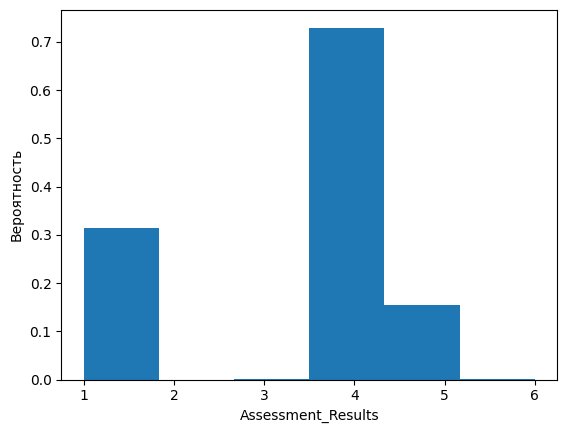

In [15]:
plt.xlabel('Assessment_Results')
plt.ylabel('Вероятность')
plt.hist(x=data_train['Assessment_Results'], bins=6, density=True)

In [16]:
unique, counts = np.unique(data_train.Assessment_Results, return_counts=True)

result = np.column_stack((unique, counts)) 
print (result)

[[    1 16172]
 [    2     4]
 [    3   102]
 [    4 37653]
 [    5  7977]
 [    6     9]]


C:\Users\nikit\AppData\Local\Temp\ipykernel_4152\3318759186.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['Assessment_Results'] = lbl.transform(list(data_train['Assessment_Results'].values.astype('int')))


(array([0.39251157, 0.91387819, 0.19361024]),
 array([0.        , 0.66666667, 1.33333333, 2.        ]),
 <BarContainer object of 3 artists>)

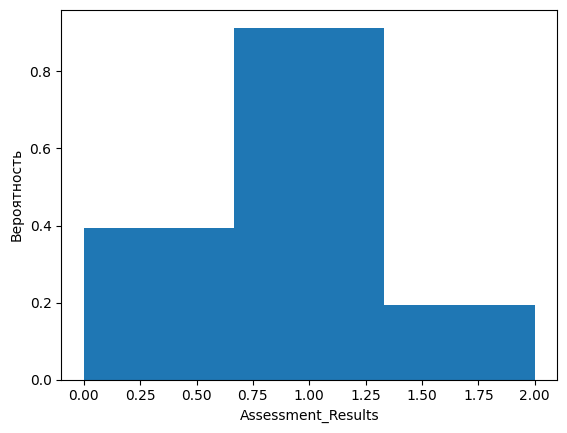

In [17]:
data_train = data_train.loc[~df['Assessment_Results'].isin([2,3,6])]

lbl = preprocessing.LabelEncoder()
lbl.fit(list(data_train['Assessment_Results'].values.astype('int')))
data_train['Assessment_Results'] = lbl.transform(list(data_train['Assessment_Results'].values.astype('int')))

plt.xlabel('Assessment_Results')
plt.ylabel('Вероятность')
plt.hist(x=data_train['Assessment_Results'], bins=3, density=True)

<AxesSubplot:>

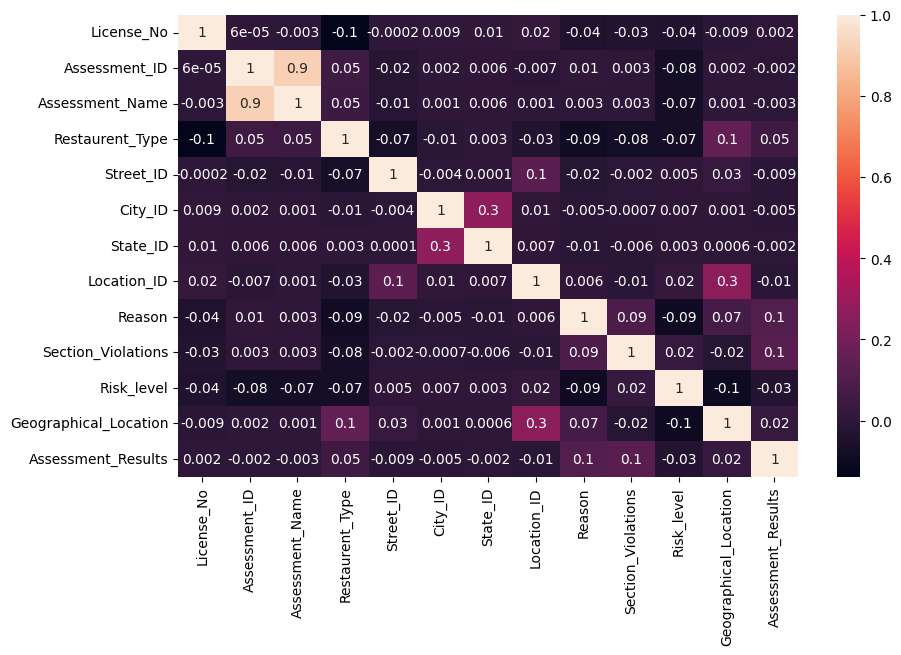

In [18]:
plt.figure(figsize=(10, 6))
sns.heatmap(data_train.corr(), annot = True, fmt = '.1g')

In [19]:
data_train = data_train.drop(['Assessment_ID', 'Assessment_Name', 'Street_ID', 'City_ID', 'State_ID'], axis = 1)
data_train

,License_No,Restaurent_Type,Location_ID,Reason,Section_Violations,Risk_level,Geographical_Location,Assessment_Results
0,0.951433,1.0,0.123894,0.000000,0.028986,0.0,0.182619,0
2,0.045892,1.0,0.176991,1.000000,0.449275,0.0,0.798584,1
3,0.296882,1.0,0.119469,0.000000,0.246377,0.0,0.039022,0
4,0.765993,1.0,0.247788,1.000000,0.478261,0.0,0.720005,1
5,0.752781,1.0,0.225664,1.000000,0.463768,0.0,0.069121,1
...,...,...,...,...,...,...,...,...
117478,0.928889,1.0,0.092920,1.000000,0.449275,0.0,0.522931,1
117483,0.281558,1.0,0.154867,1.000000,0.289855,0.0,0.171078,2
117484,0.985692,1.0,0.075221,0.666667,0.463768,0.0,0.766998,1
117486,0.157815,1.0,0.035398,1.000000,0.449275,0.0,0.252275,1


<AxesSubplot:xlabel='Section_Violations', ylabel='Reason'>

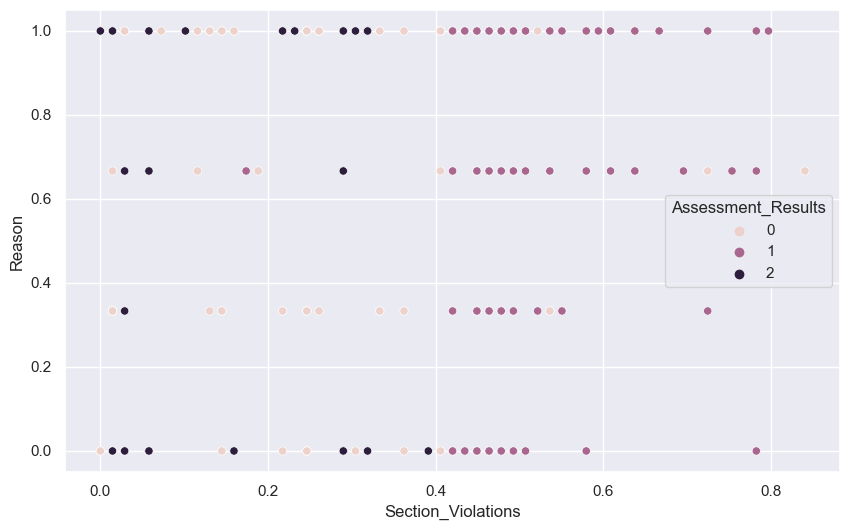

In [20]:
sns.set(rc={'figure.figsize':'10, 6'})

sns.scatterplot(x='Section_Violations', y = 'Reason', hue = 'Assessment_Results', data = data_train.sample(500))

Обучение

In [21]:
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets, decomposition

In [22]:
X = data_train.drop('Assessment_Results', axis = 1)
y = data_train.Assessment_Results

Метод главных компонент

C:\Users\nikit\AppData\Local\Temp\ipykernel_4152\1777919180.py:3: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, elev = 17)
C:\Users\nikit\AppData\Local\Temp\ipykernel_4152\1777919180.py:17: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_clr = np.choose(y, [1, 2, 0]).astype(np.float)


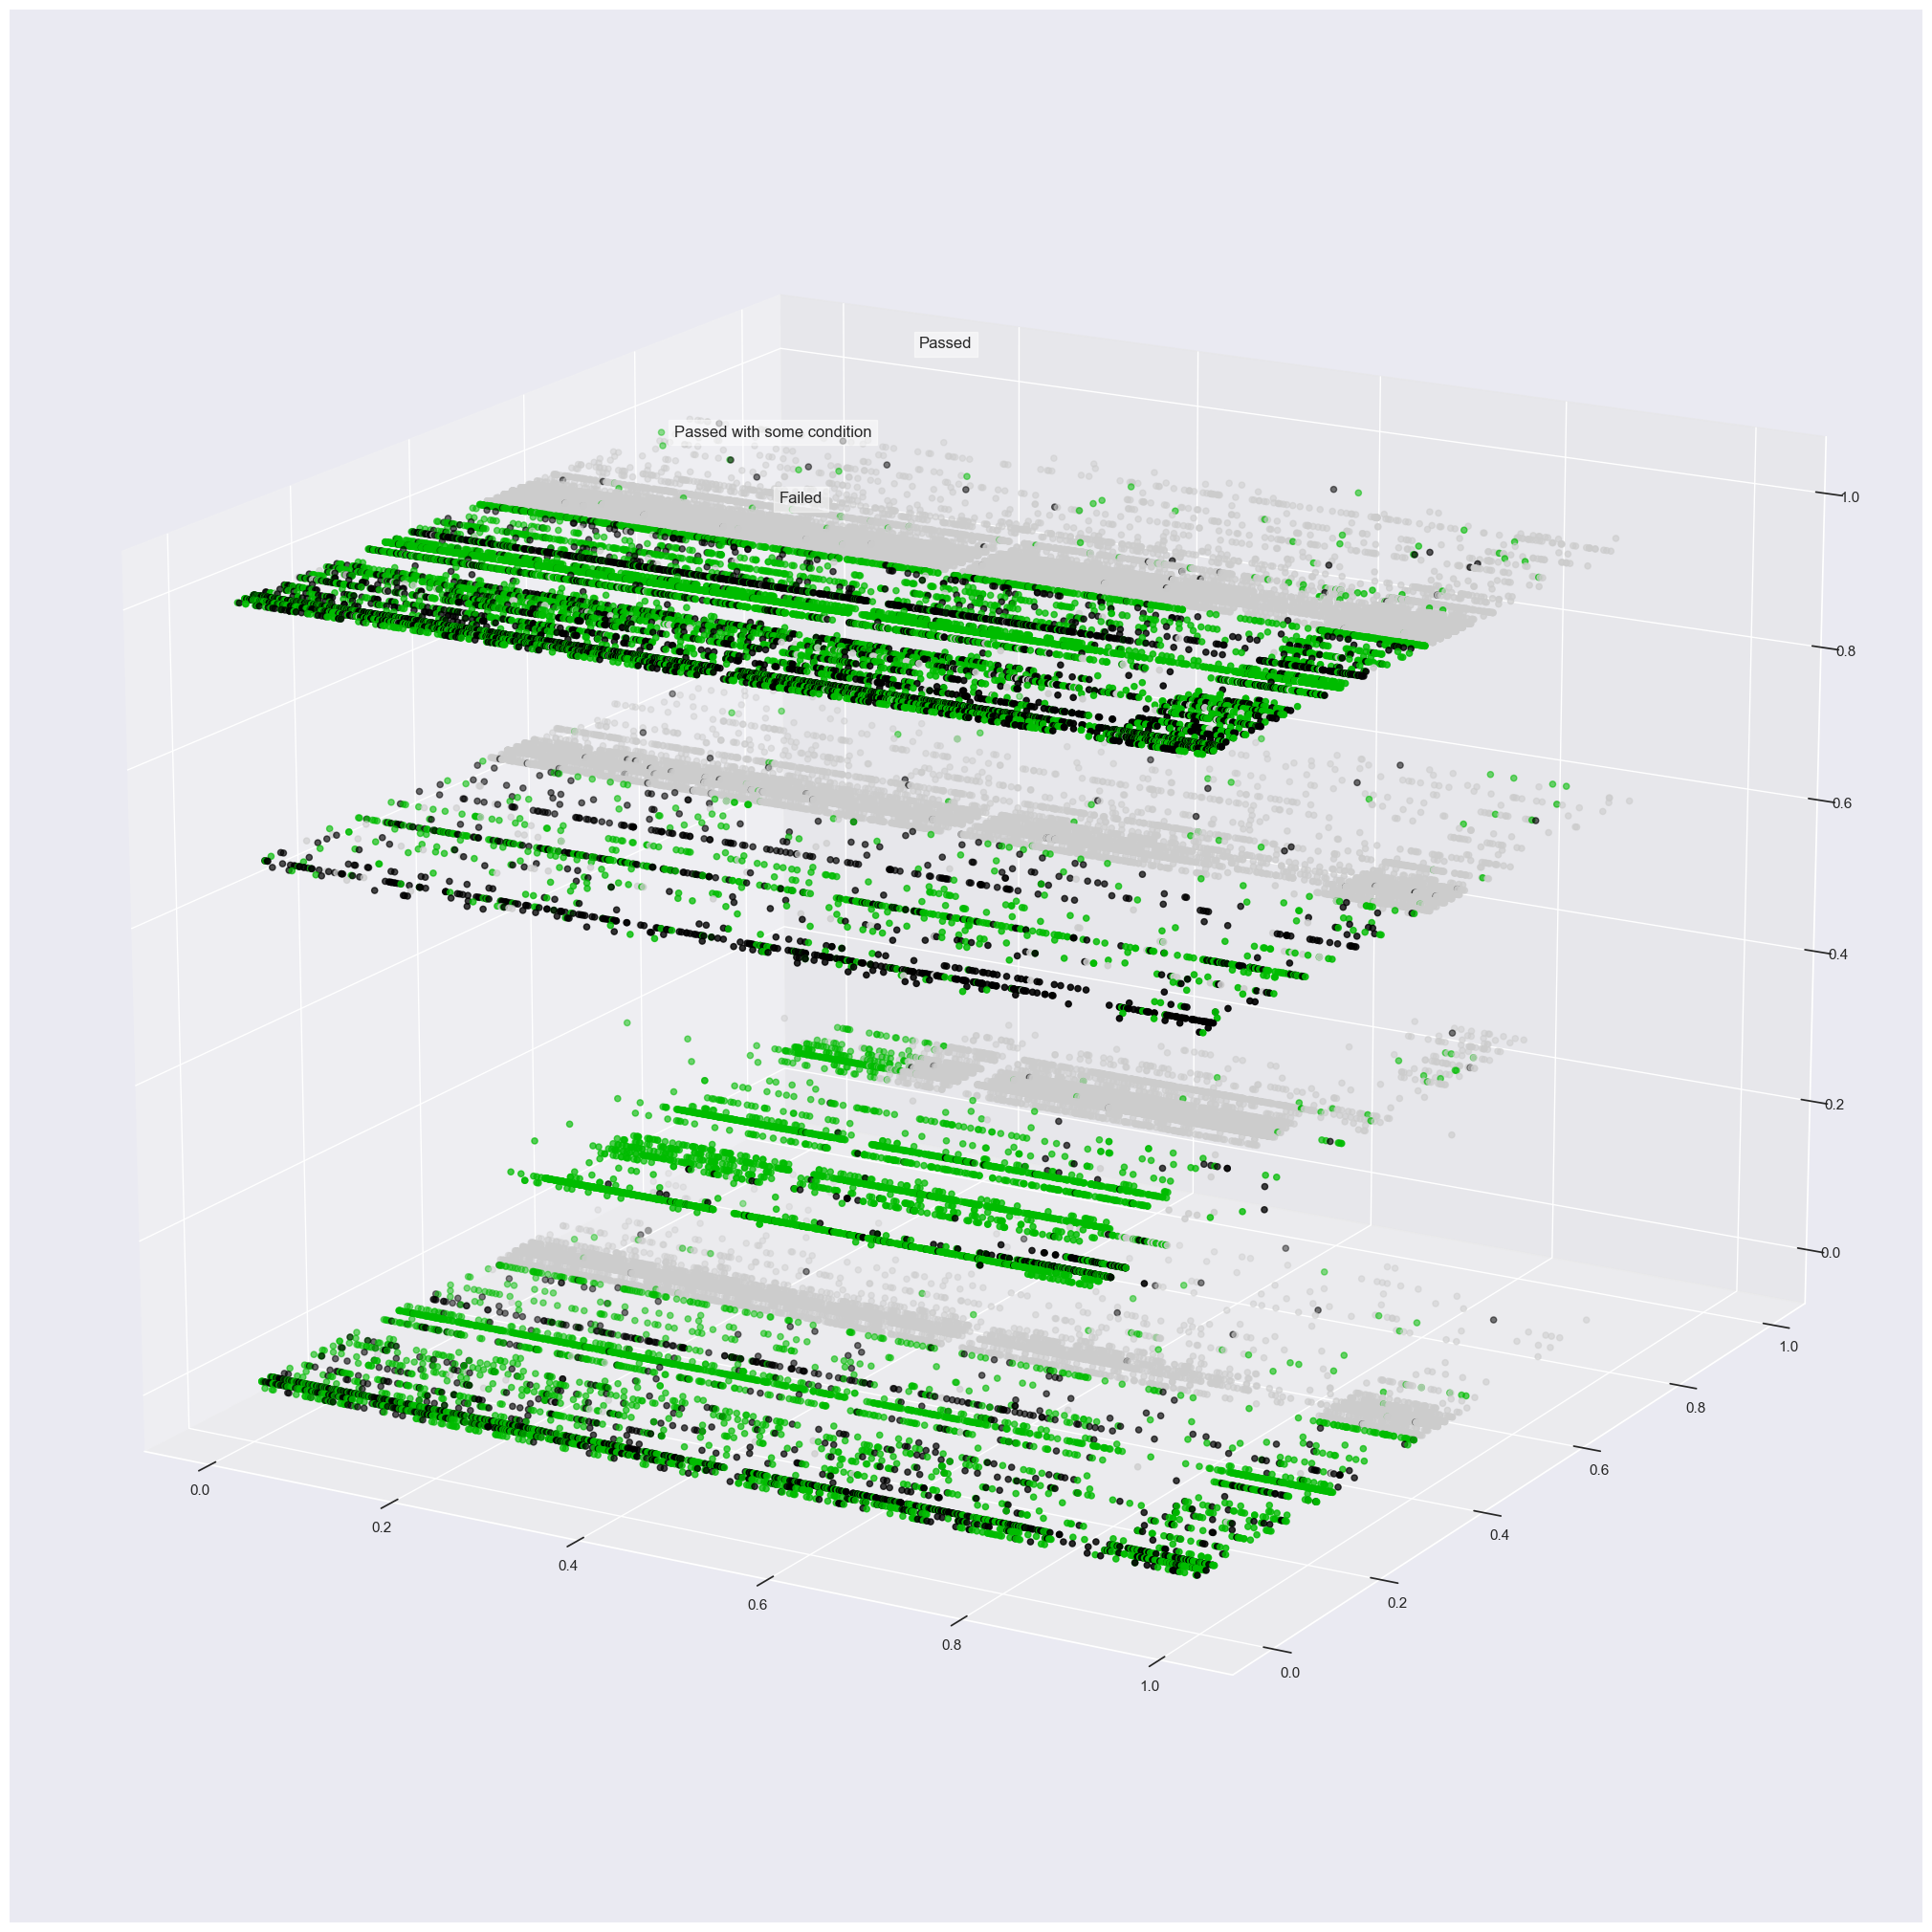

In [23]:
fig = plt.figure(1, figsize=(25, 20))
plt.clf()
ax = Axes3D(fig, elev = 17)

plt.cla()

for name, label in [("Failed", 0), ("Passed", 1), ("Passed with some condition", 2)]:
    ax.text3D(
        data_train.License_No.where(data_train.Assessment_Results == label).mean(),
        data_train.Section_Violations.where(data_train.Assessment_Results == label).mean(),
        data_train.Reason.where(data_train.Assessment_Results == label).mean() + 0.5,
        name,
        horizontalalignment="center",
        bbox=dict(alpha=0.5, edgecolor="w", facecolor="w"),
    )

y_clr = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X.License_No, X.Section_Violations, X.Reason, c=y_clr, cmap=plt.cm.nipy_spectral)


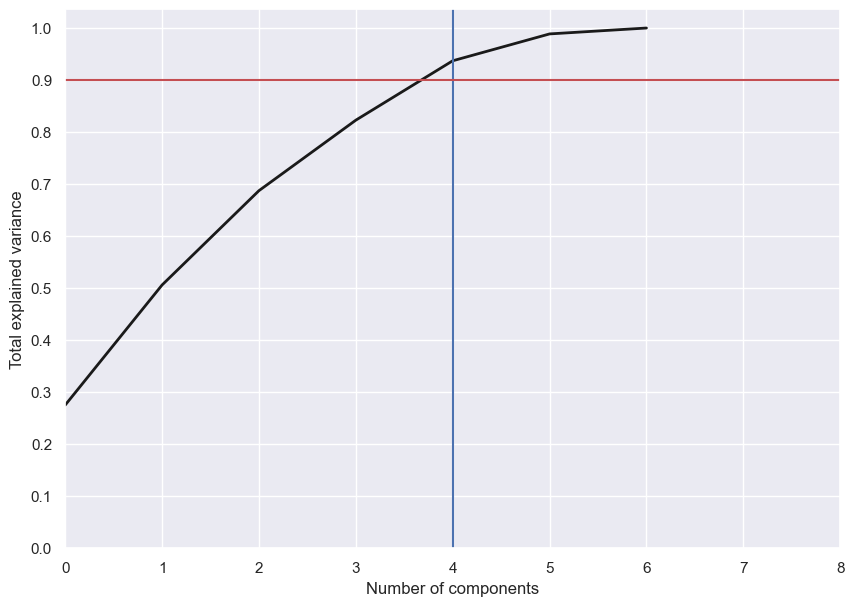

In [24]:
pca = decomposition.PCA().fit(X)

plt.figure(figsize=(10, 7))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color="k", lw=2)
plt.xlabel("Number of components")
plt.ylabel("Total explained variance")
plt.xlim(0, 8)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.axvline(4, c="b")
plt.axhline(0.9, c="r")
plt.show();

In [25]:
pca = decomposition.PCA(n_components = 4)
X_reduced = pca.fit_transform(X)
X_reduced

array([[ 0.22513219, -0.76865713,  0.41681543, -0.11430427],
       [-0.36935434,  0.07980478, -0.43669459,  0.13907327],
       [ 0.25059107, -0.72258358,  0.10581239,  0.46686541],
       ...,
       [-0.20434344, -0.22494586,  0.14742748, -0.51273489],
       [-0.28107036,  0.10762836, -0.21169474,  0.38000541],
       [-0.18632906,  0.43869176,  0.76272483,  0.44384967]])

K-means

In [28]:
from sklearn.cluster import KMeans

In [29]:
inertia = []
for k in range(1, 8):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(X)
    inertia.append(np.sqrt(kmeans.inertia_))

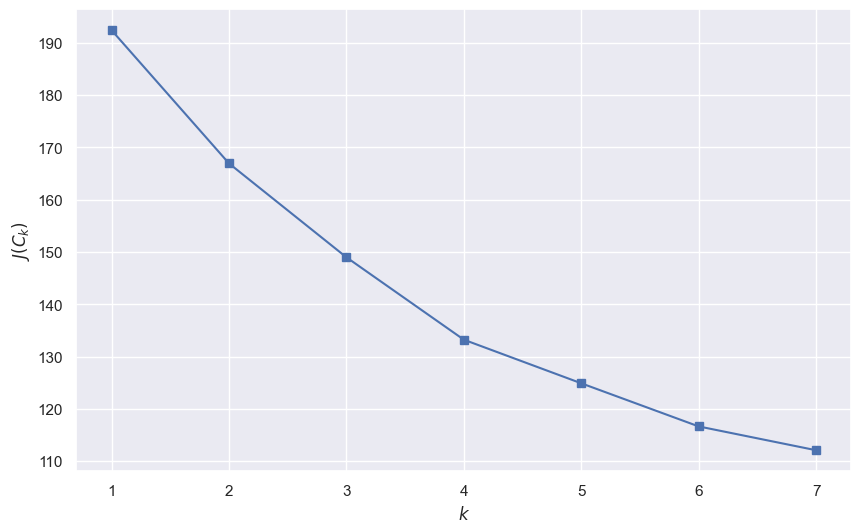

In [30]:
plt.plot(range(1, 8), inertia, marker="s")
plt.xlabel("$k$")
plt.ylabel("$J(C_k)$");

In [31]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

KMeans(n_clusters=3, random_state=42)

Text(0.5, 1.0, 'True')

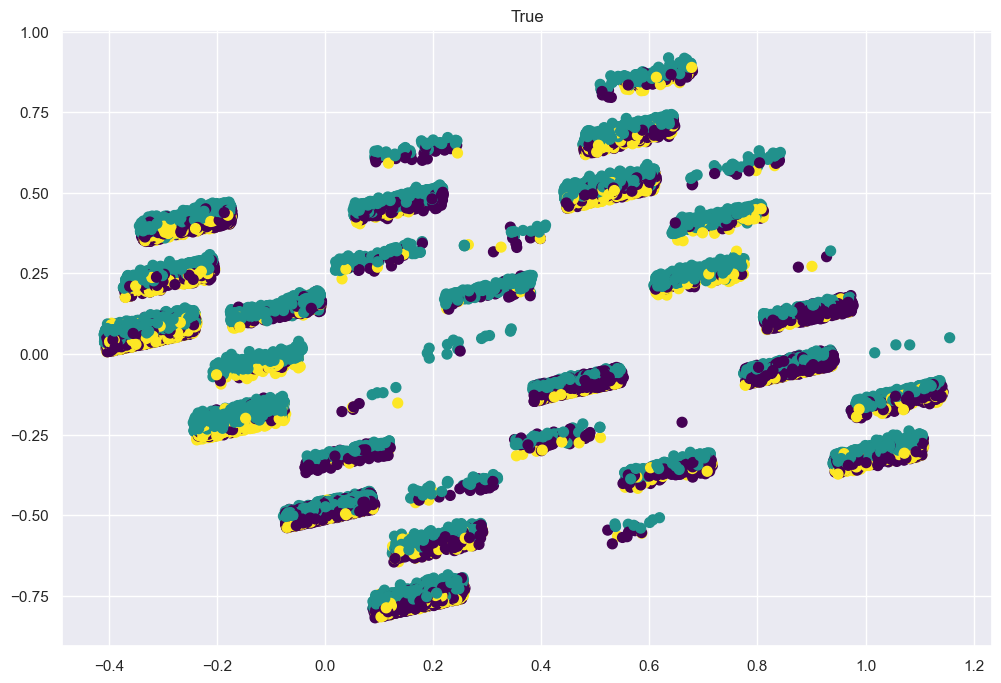

In [32]:
pca = decomposition.PCA(n_components=2)
res = pca.fit_transform(X)
plt.figure(figsize=(12,8))
plt.scatter(res[:,0], res[:,1], c=y, s=50, cmap='viridis')
plt.title('True')

Text(0.5, 1.0, 'KMeans')

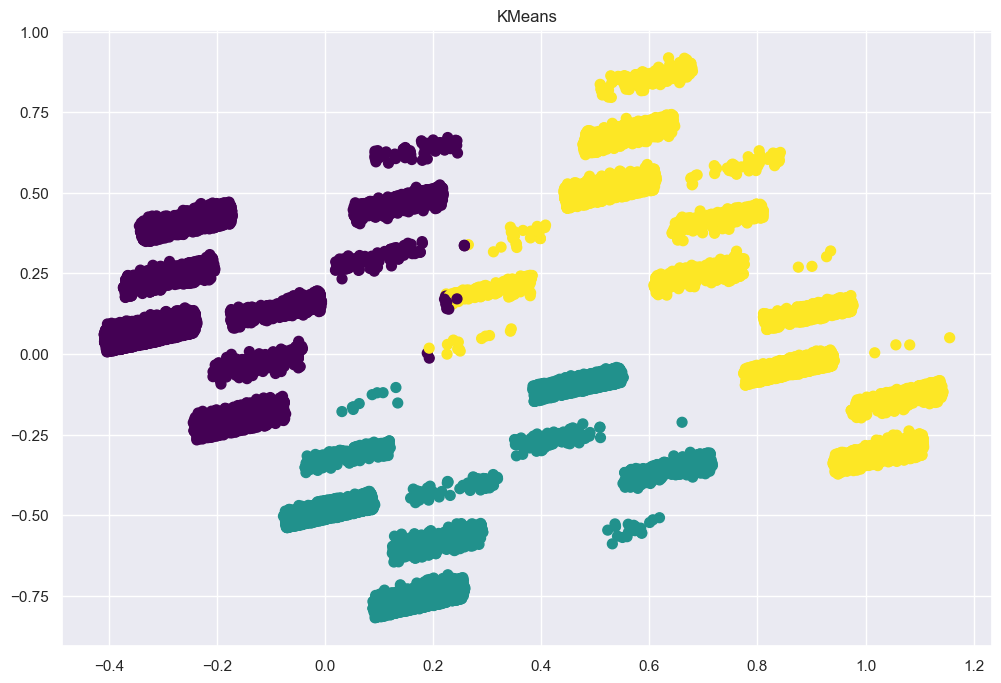

In [33]:
plt.figure(figsize=(12,8))
plt.scatter(res[:,0], res[:,1], c=kmeans.labels_, s=50, cmap='viridis')
plt.title('KMeans')

DBSCAN

In [34]:
from sklearn.cluster import DBSCAN

In [35]:
dbscan = DBSCAN(eps = 0.2, min_samples = 3, n_jobs=-1).fit(X)

Text(0.5, 1.0, 'DBSCAN')

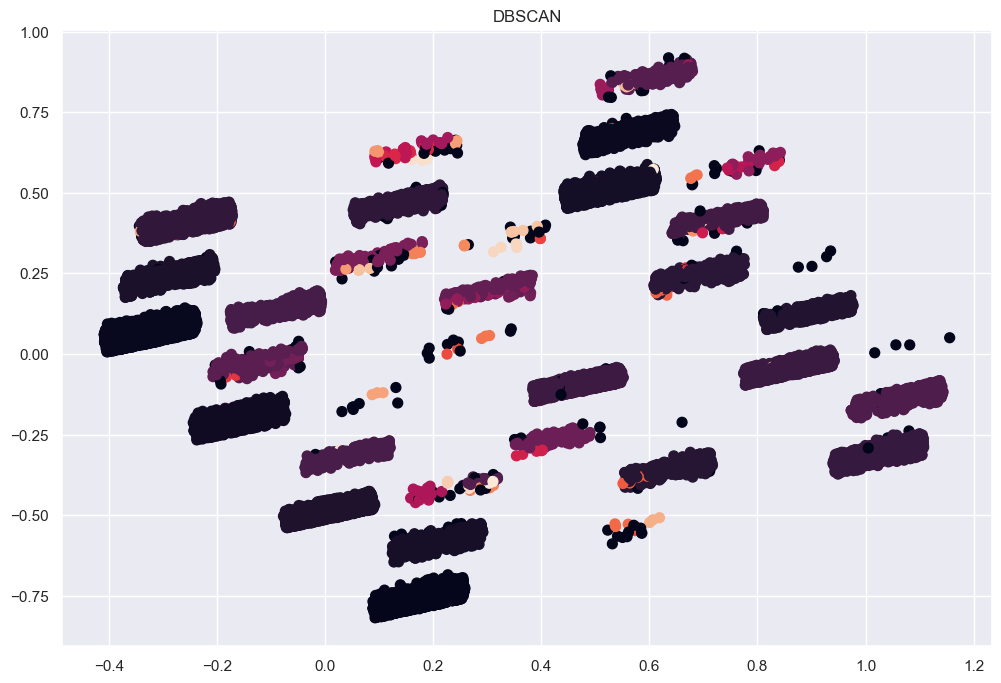

In [36]:
plt.figure(figsize=(12,8))
plt.scatter(res[:,0], res[:,1], c=dbscan.labels_, s=50)
plt.title('DBSCAN')

Иерархичекая кластеризация

In [47]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

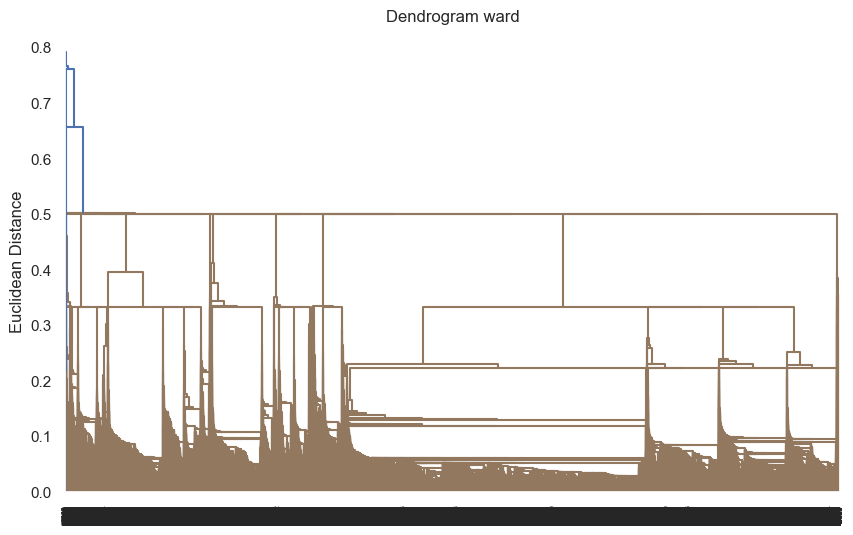

In [48]:
x_sample = X.sample(30000)
dendrogram = sch.dendrogram(sch.linkage(x_sample, method='single'))
plt.title('Dendrogram ward')
plt.ylabel('Euclidean Distance')
plt.show()

Text(0.5, 1.0, 'Agglomerative')

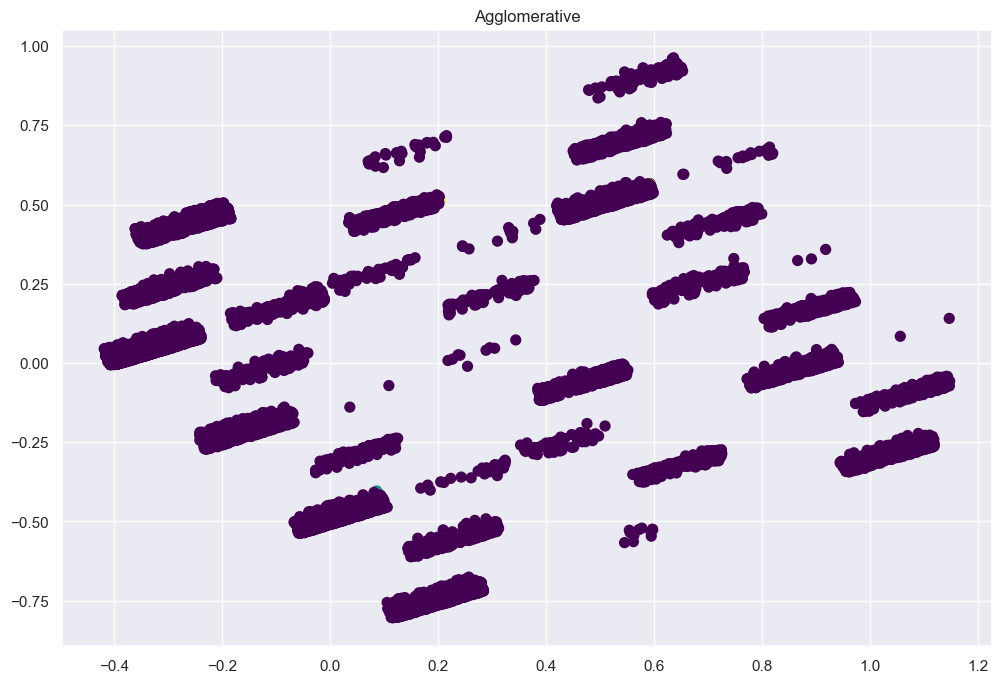

In [50]:
agglomerative = AgglomerativeClustering(n_clusters=3, linkage='single').fit(x_sample)
pca = decomposition.PCA(n_components=2)
res = pca.fit_transform(x_sample)
plt.figure(figsize=(12,8))
plt.scatter(res[:,0], res[:,1], c=agglomerative.labels_, s=50, cmap='viridis')
plt.title('Agglomerative')

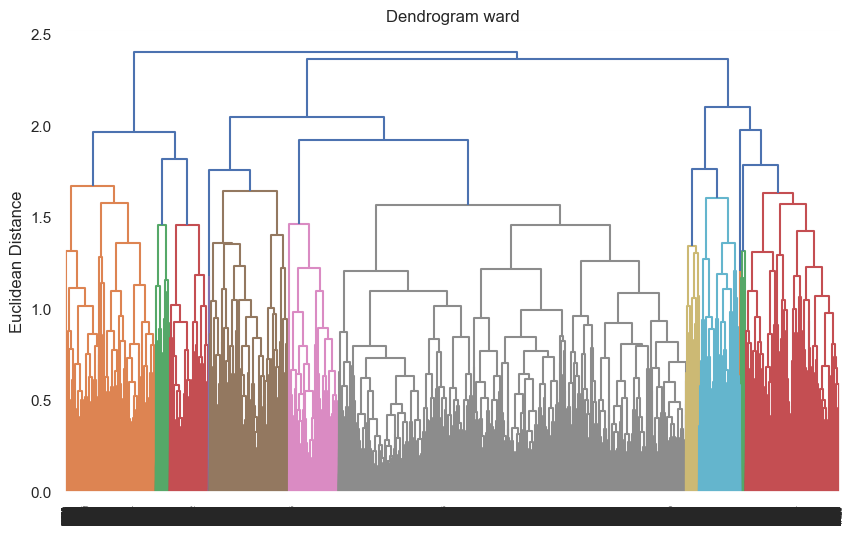

In [51]:
dendrogram = sch.dendrogram(sch.linkage(x_sample, method='complete'))
plt.title('Dendrogram ward')
plt.ylabel('Euclidean Distance')
plt.show()

Text(0.5, 1.0, 'Agglomerative')

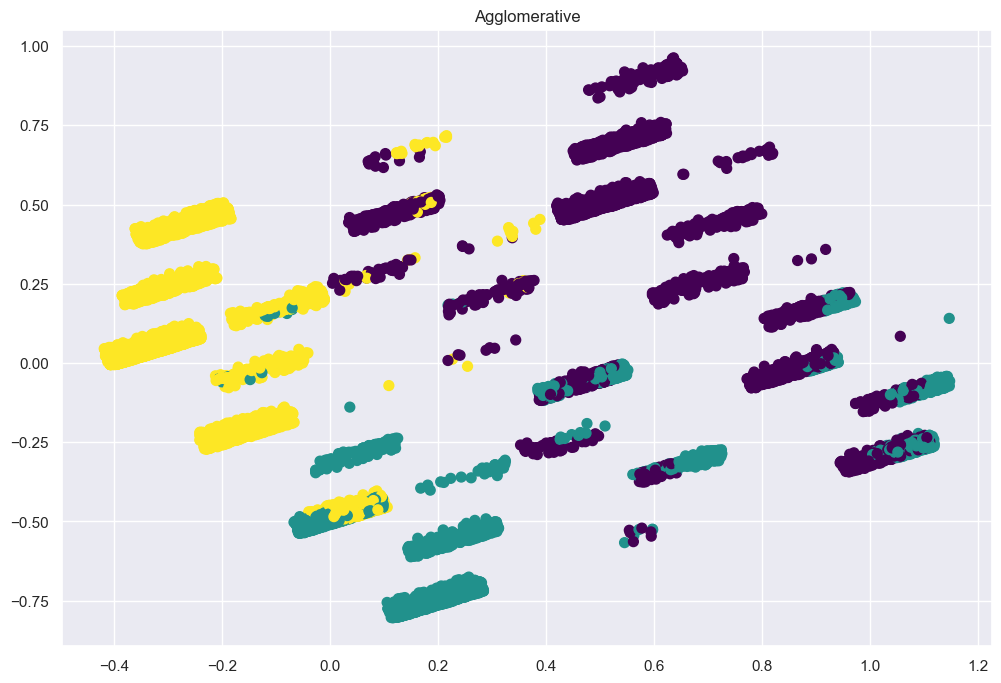

In [52]:
agglomerative = AgglomerativeClustering(n_clusters=3, linkage='complete').fit(x_sample)
pca = decomposition.PCA(n_components=2)
res = pca.fit_transform(x_sample)
plt.figure(figsize=(12,8))
plt.scatter(res[:,0], res[:,1], c=agglomerative.labels_, s=50, cmap='viridis')
plt.title('Agglomerative')

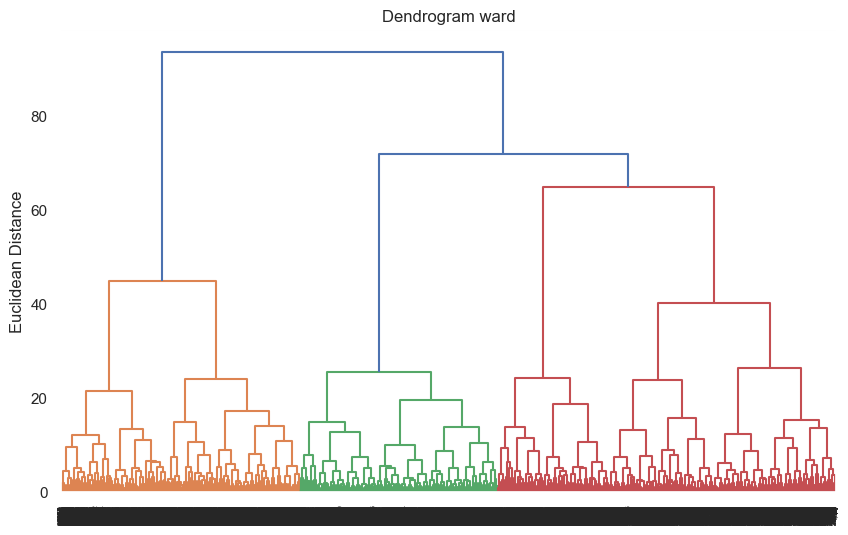

In [53]:
dendrogram = sch.dendrogram(sch.linkage(x_sample, method='ward'), p = 15, truncate_mode = "level")
plt.title('Dendrogram ward')
plt.ylabel('Euclidean Distance')
plt.show()

Text(0.5, 1.0, 'Agglomerative')

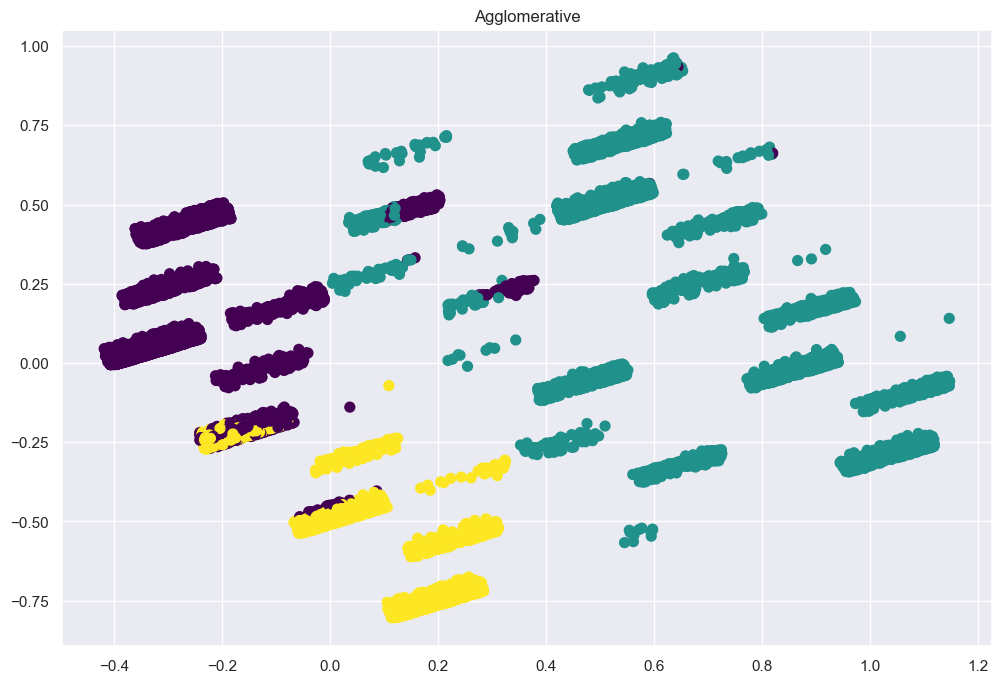

In [54]:
agglomerative = AgglomerativeClustering(n_clusters=3, linkage='ward').fit(x_sample)
pca = decomposition.PCA(n_components=2)
res = pca.fit_transform(x_sample)
plt.figure(figsize=(12,8))
plt.scatter(res[:,0], res[:,1], c=agglomerative.labels_, s=50, cmap='viridis')
plt.title('Agglomerative')